# Análisis de tiempos en filtro de partículas

El objetivo de este análisis es determinar qué funciones dentro del filtro consumen más tiempo de procesamiento para plantear alternativas en busca de su optimización. Además determinar el impacto en el tiempo de procesamiento de cada función con respecto al número de partículas y a la cantidad de landmarks de manera de intentar determinar futuros problemas cuando se escale el proyecto a mapas de entornos más grandes.
Para lograrlo se tomaron datos de los tiempos en segundos de cada etapa del procesamiento en las pruebas del robot y se guardaron en los siguiente archivos:

- out_10p_8lnd.txt:   10 partículas 8 landmarks
- out_10p_16lnd.txt:  10 partículas 16 landmarks
- out_10p_24lnd.txt:  10 partículas 24 landmarks
- out_100p_8lnd.txt:  10 partículas 8 landmarks
- out_100p_16lnd.txt: 100 partículas 16 landmarks
- out_100p_24lnd.txt: 100 partículas 24 landmarks
- out_30p_8lnd.txt:   30 partículas 8 landmarks
- out_30p_16lnd.txt:  30 partículas 16 landmarks
- out_30p_24lnd.txt:  30 partículas 24 landmarks


In [128]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

In [129]:
import os

Path = "./"
filelist = os.listdir(Path)
if 'Análisis_Datos_Tiempos.ipynb' in filelist: filelist.remove('Análisis_Datos_Tiempos.ipynb')
if 'Análisis_Datos_Control.ipynb' in filelist: filelist.remove('Análisis_Datos_Control.ipynb')
if 'control_file.log' in filelist: filelist.remove('control_file.log')
if '.ipynb_checkpoints' in filelist: filelist.remove('.ipynb_checkpoints')
filelist_filtered = []
filelist_kd_tree = []
for i in range(len(filelist)):
    if not ('out2_' in filelist[i]):
        filelist_filtered.append(filelist[i])
    else:
        filelist_kd_tree.append(filelist[i])
            
filelist_filtered.sort()
print(filelist_filtered)

['out_100p_16lnd.txt', 'out_100p_24lnd.txt', 'out_100p_8lnd.txt', 'out_10p_16lnd.txt', 'out_10p_24lnd.txt', 'out_10p_8lnd.txt', 'out_200p_16lnd.txt', 'out_200p_24lnd.txt', 'out_200p_8lnd.txt', 'out_30p_16lnd.txt', 'out_30p_24lnd.txt', 'out_30p_8lnd.txt', 'out_400p_16lnd.txt', 'out_400p_24lnd.txt', 'out_400p_8lnd.txt']


In [130]:
files = []
files_data = []

for i in filelist_filtered:
    name_filtered = i.replace('.','_').split('_')
    print(name_filtered)
    files_data.append([int(name_filtered[1].replace('p','')), int(name_filtered[2].replace('lnd','')) ])
    
for i in filelist_filtered:
    files.append(open(i))

['out', '100p', '16lnd', 'txt']
['out', '100p', '24lnd', 'txt']
['out', '100p', '8lnd', 'txt']
['out', '10p', '16lnd', 'txt']
['out', '10p', '24lnd', 'txt']
['out', '10p', '8lnd', 'txt']
['out', '200p', '16lnd', 'txt']
['out', '200p', '24lnd', 'txt']
['out', '200p', '8lnd', 'txt']
['out', '30p', '16lnd', 'txt']
['out', '30p', '24lnd', 'txt']
['out', '30p', '8lnd', 'txt']
['out', '400p', '16lnd', 'txt']
['out', '400p', '24lnd', 'txt']
['out', '400p', '8lnd', 'txt']


In [131]:
lines = []

for i in files:
    lines.append(i.readlines())
    
lines_filtered = []
classes_filtered = []
for i in lines:
    tmp = []
    classes = []
    for j in i:
        if ('Tiempo' in j):
            replace = j.replace('\n','').replace(':','').split()
            if (replace[-2] not in classes):
                classes.append(replace[-2])
                tmp.append([float(replace[-1])])
            else:
                for k in range(len(classes)):
                    if (replace[-2] == classes[k]):
                        tmp[k].append(float(replace[-1]))
    lines_filtered.append(tmp)
    classes_filtered.append(classes)

In [132]:
means = []
for i in range(len(lines_filtered)):
    tmp = []
    for j in range(len(lines_filtered[i])):
        tmp.append(statistics.median(lines_filtered[i][j]))
    means.append(tmp)

In [133]:
sample = 1

In [134]:
print(classes_filtered[sample])

['prediccion', 'Rotacion', 'PrediccionLnmk', 'AsociccionLnmk', 'WeightLnmk', 'update', 'Norm', 'Resample', 'top']


['prediccion', 'top']
[0.003745, 6.952952]


([0, 1], <a list of 2 Text major ticklabel objects>)

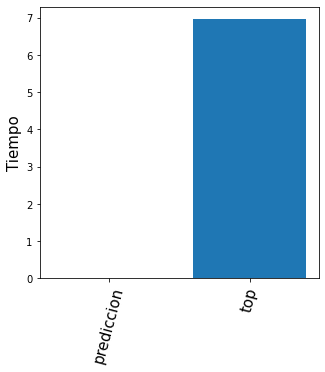

In [135]:
filter = ['prediccion','top'] # Ver solo los dos procesos mas importantes para solo un ejemplo
x = filter

y = []
for i in filter:
    for j in range(len(means[sample])):
        if (i == classes_filtered[sample][j]):
            y.append(means[sample][j])

print(x)
print(y)
            
fig = plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.ylabel('Tiempo', fontsize=15)
plt.xticks(rotation=75,fontsize=15)

Podemos descartar optimizar algo de la predicción, ya que la mayor parte del procesamiento esta en la parte de actualización de pesos (top)

['update', 'Norm', 'Resample']
[6.8058805, 0.0009865, 0.151047]
6.957914


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

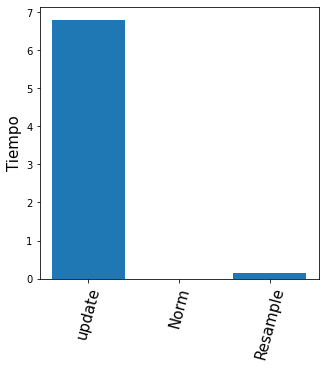

In [136]:
filter = ['update','Norm','Resample']
x = filter

y = []
for i in filter:
    for j in range(len(means[sample])):
        if (i == classes_filtered[sample][j]):
            y.append(means[sample][j])

print(x)
print(y)
print(sum(y))
            
fig = plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.ylabel('Tiempo', fontsize=15)
plt.xticks(rotation=75,fontsize=15)

Dentro de la etapa de actualización de pesos tenemos el cálculo de ponderación(update), la normalización de los pesos y la etapa de resampleo de las partículas. Como puede observarse, la etapa de ponderación consume la mayoría del tiempo.

['Rotacion', 'PrediccionLnmk', 'AsociccionLnmk', 'WeightLnmk']
[0.002844, 0.000359, 0.06337, 0.000272]
0.06684499999999999


([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

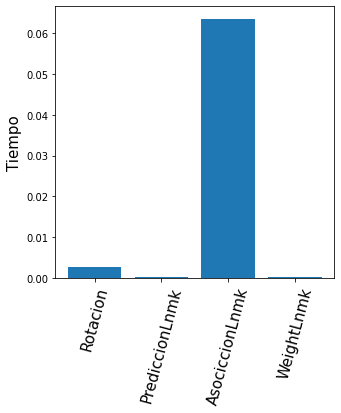

In [137]:
filter = [ 'Rotacion', 'PrediccionLnmk', 'AsociccionLnmk', 'WeightLnmk'] 
x = filter

y = []
for i in filter:
    for j in range(len(means[sample])):
        if (i == classes_filtered[sample][j]):
            y.append(means[sample][j])

print(x)
print(y)
print(sum(y))
            
fig = plt.figure(figsize=(5,5))
plt.bar(x,y)
plt.ylabel('Tiempo', fontsize=15)
plt.xticks(rotation=75,fontsize=15)

Dentro de la etapa de cálculo de ponderaciones de las partículas el mayor tiempo de procesamiento lo tiene la etapa de asociación de landmarks con las mediciones del laser y la rotación de las mediciones con respecto a la partícula. Siendo estas dos funciones las candidatas a optimizar para lograr un algoritmo lo suficientemente rápido para trabajar en tiempo real.

In [138]:
for i in range(len(classes_filtered)):
    classes_filtered[i],means[i] = (list(t) for t in zip(*sorted(zip(classes_filtered[i],means[i]))))

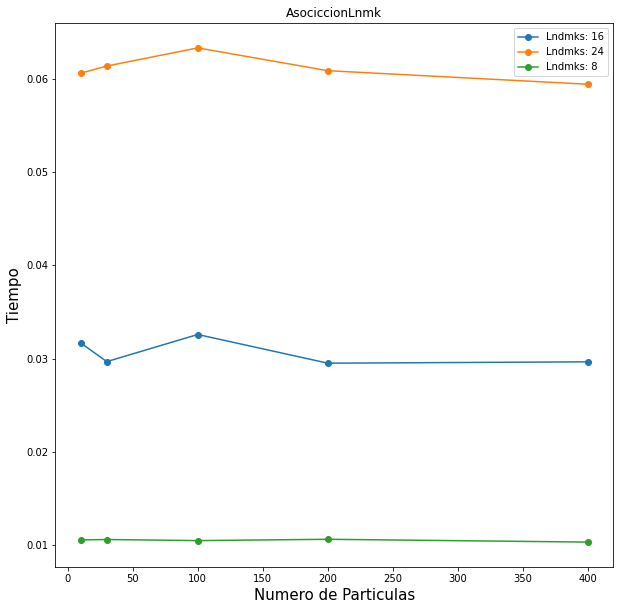

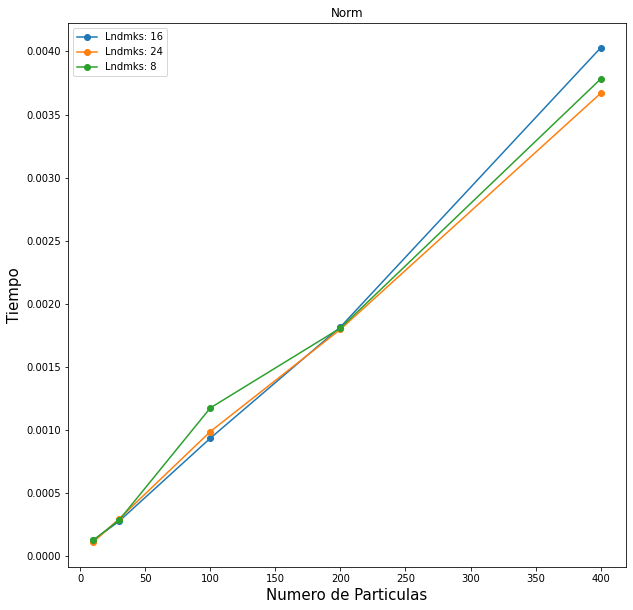

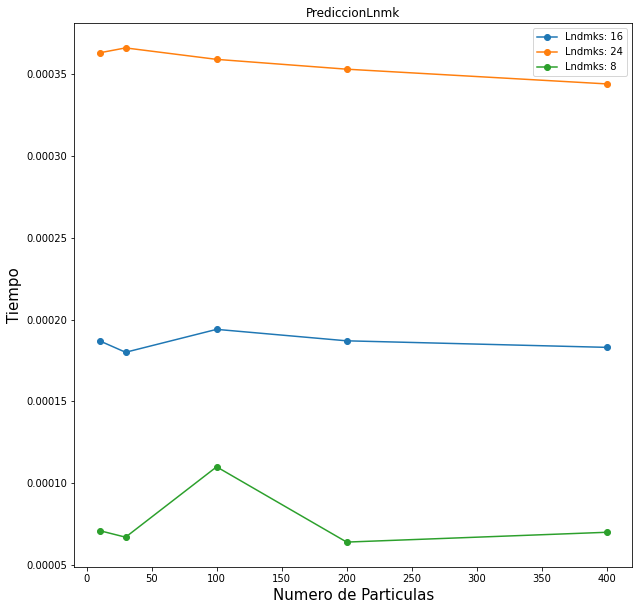

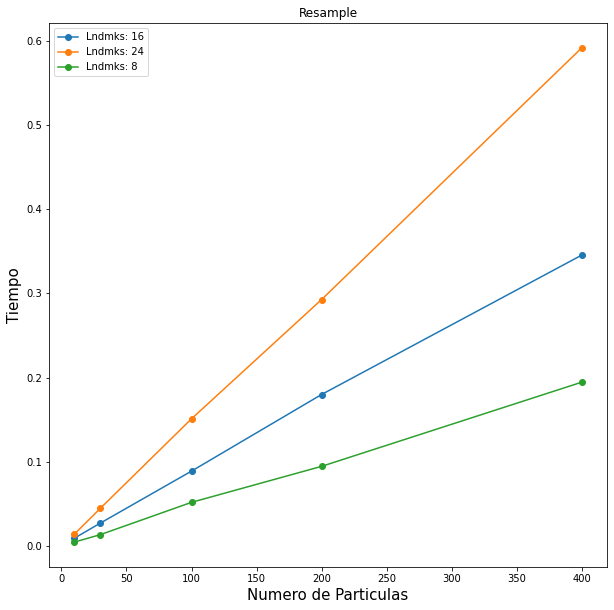

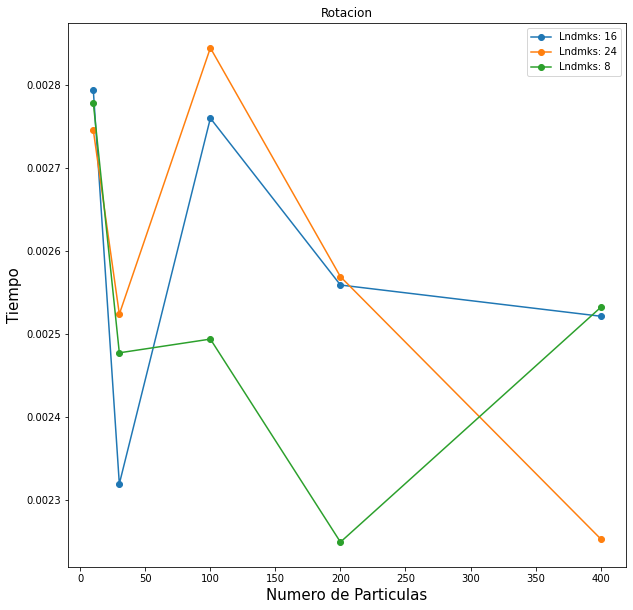

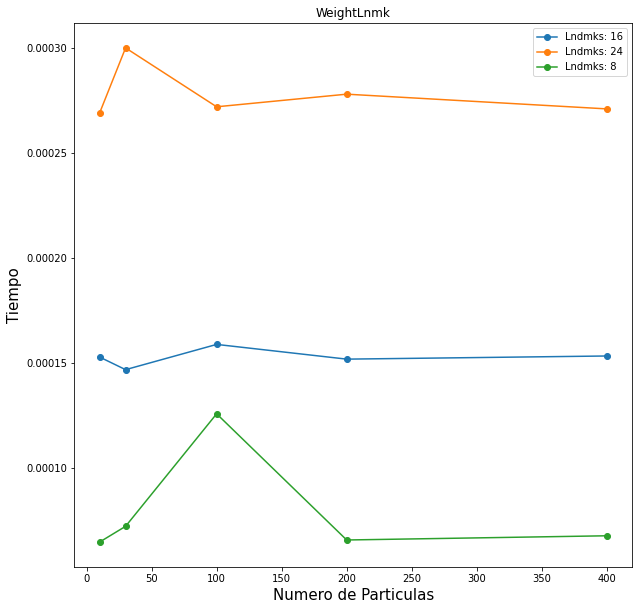

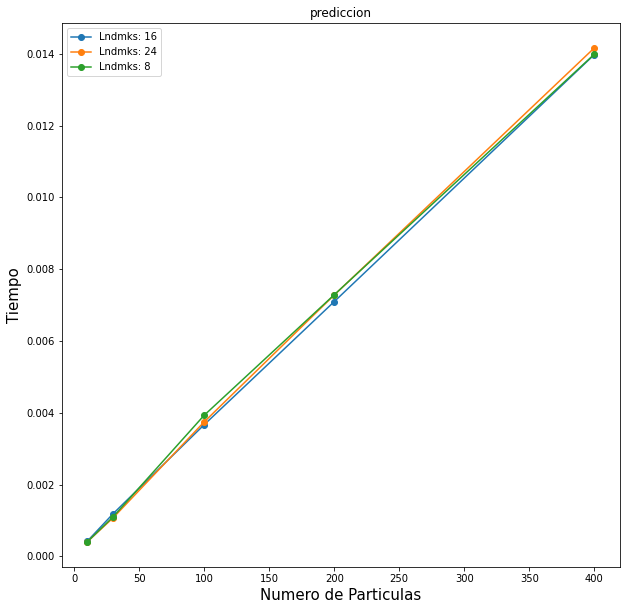

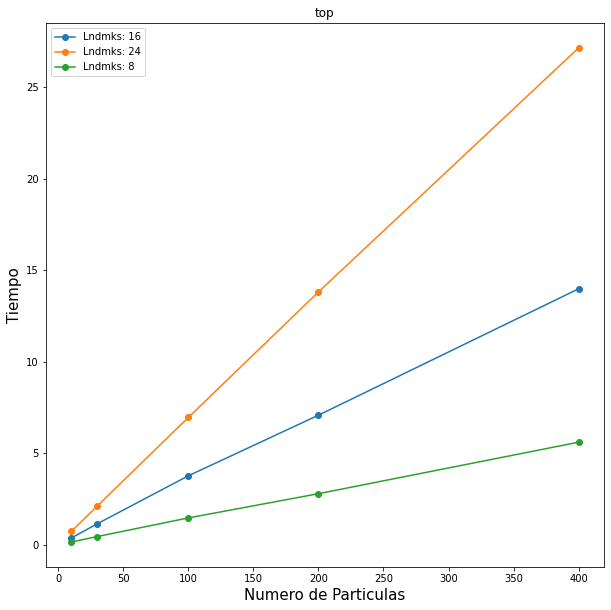

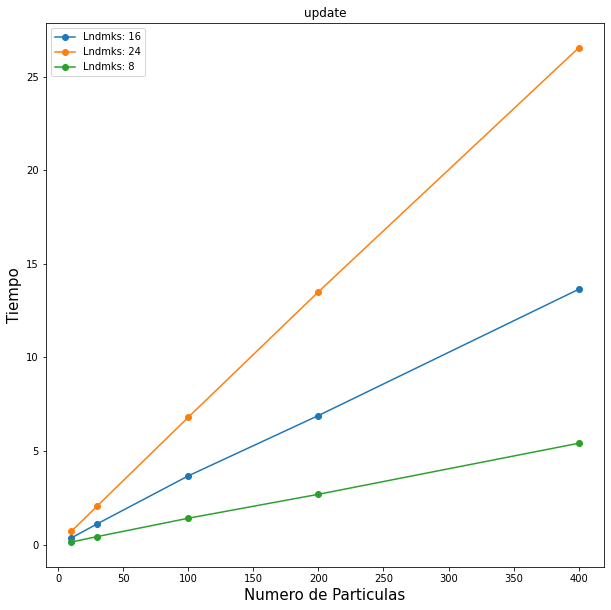

In [149]:
x = []
y = []

for j in range(len(classes_filtered[0])):
    fig = plt.figure(figsize=(10,10))
    x = []
    y = []
    lndmk = []
    for i in range(len(classes_filtered)):
        if (files_data[i][1] not in lndmk):
            lndmk.append(files_data[i][1])
            x.append([files_data[i][0]])
            y.append([means[i][j]])
        else:
            for k in range(len(lndmk)):
                if (files_data[i][1] == lndmk[k]):
                    x[k].append(files_data[i][0])
                    y[k].append(means[i][j]) 
                    
    for k in range(len(x)):
        x[k],y[k] = (list(t) for t in zip(*sorted(zip(x[k],y[k]))))
                    
    for k in range(len(x)):
        plt.plot(x[k],y[k],'o-', label='Lndmks: '+str(lndmk[k]))
    plt.ylabel('Tiempo', fontsize=15)
    plt.xlabel('Numero de Particulas', fontsize=15)
    plt.title(classes_filtered[0][j])
    plt.legend()
    plt.show()

Se optimizó la etapa de asociación de landmarks utilizando un árbol KD obteniéndose los siguientes resultados

In [140]:
files_kd_tree = []
files_data_kd_tree = []

for i in filelist_kd_tree:
    name_filtered = i.replace('.','_').split('_')
    print(name_filtered)
    files_data_kd_tree.append([int(name_filtered[1].replace('p','')), int(name_filtered[2].replace('lnd','')) ])
    
for i in filelist_kd_tree:
    files_kd_tree.append(open(i))

['out2', '100p', '16lnd', 'txt']
['out2', '30p', '8lnd', 'txt']
['out2', '10p', '24lnd', 'txt']
['out2', '400p', '8lnd', 'txt']
['out2', '400p', '16lnd', 'txt']
['out2', '10p', '8lnd', 'txt']
['out2', '30p', '16lnd', 'txt']
['out2', '30p', '24lnd', 'txt']
['out2', '100p', '8lnd', 'txt']
['out2', '400p', '24lnd', 'txt']
['out2', '10p', '16lnd', 'txt']
['out2', '200p', '24lnd', 'txt']
['out2', '200p', '16lnd', 'txt']
['out2', '200p', '8lnd', 'txt']


In [141]:
lines = []

for i in files_kd_tree:
    lines.append(i.readlines())
    
lines_kd_tree_filtered = []
classes_kd_tree_filtered = []
for i in lines:
    tmp = []
    classes = []
    for j in i:
        if ('Tiempo' in j):
            replace = j.replace('\n','').replace(':','').split()
            if (replace[-2] not in classes):
                classes.append(replace[-2])
                tmp.append([float(replace[-1])])
            else:
                for k in range(len(classes)):
                    if (replace[-2] == classes[k]):
                        tmp[k].append(float(replace[-1]))
    lines_kd_tree_filtered.append(tmp)
    classes_kd_tree_filtered.append(classes)

In [142]:
means_kd_tree = []
for i in range(len(lines_kd_tree_filtered)):
    tmp = []
    for j in range(len(lines_kd_tree_filtered[i])):
        tmp.append(statistics.median(lines_kd_tree_filtered[i][j]))
    means_kd_tree.append(tmp)

In [143]:
for i in range(len(classes_kd_tree_filtered)):
    classes_kd_tree_filtered[i],means_kd_tree[i] = (list(t) for t in zip(*sorted(zip(classes_kd_tree_filtered[i],means_kd_tree[i]))))

[[100, 16], [100, 24], [100, 8], [10, 16], [10, 24], [10, 8], [200, 16], [200, 24], [200, 8], [30, 16], [30, 24], [30, 8], [400, 16], [400, 24], [400, 8]]
[[100, 16], [30, 8], [10, 24], [400, 8], [400, 16], [10, 8], [30, 16], [30, 24], [100, 8], [400, 24], [10, 16], [200, 24], [200, 16], [200, 8]]
['AsociccionLnmk', 'Norm', 'PrediccionLnmk', 'Resample', 'Rotacion', 'WeightLnmk', 'prediccion', 'top', 'update']
[0.046995, 0.0001125, 0.000366, 0.013924, 0.004924, 0.000388, 0.0004665, 0.5725020000000001, 0.558489]
[0.060654, 0.00011, 0.000363, 0.014037, 0.002745, 0.000269, 0.00039999999999999996, 0.718693, 0.7039]


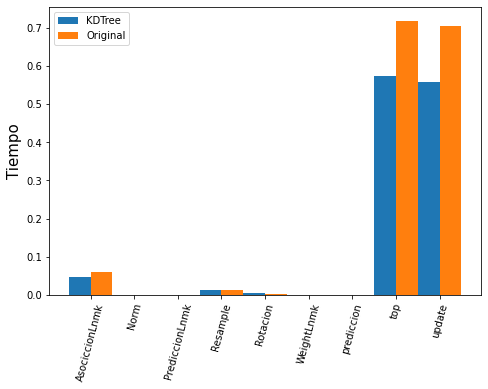

In [145]:
x = []
y = []
y1 = []

print(files_data)
print(files_data_kd_tree)

for i in classes_kd_tree_filtered[0]:
    x.append(i)

for i in means_kd_tree[2]:
    y.append(i)

for i in means[4]: 
    y1.append(i) 
    
print(x)
print(y)
print(y1)
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
X = np.arange(len(x))
ax.bar(X-0.25,y,width = 0.5, label='KDTree')
ax.bar(X+0.25,y1,width = 0.5, label='Original')
ax.legend()
plt.xticks(rotation=75)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels = x
ax.set_xticklabels(labels)
plt.ylabel('Tiempo', fontsize=15)
plt.xticks(X)
plt.show()

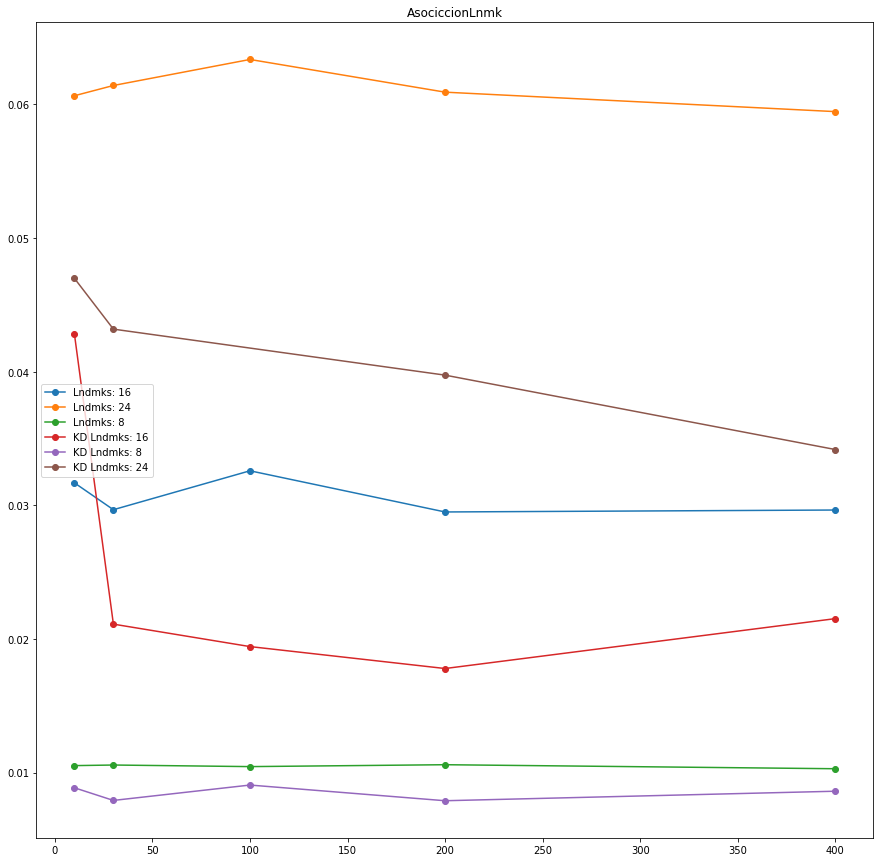

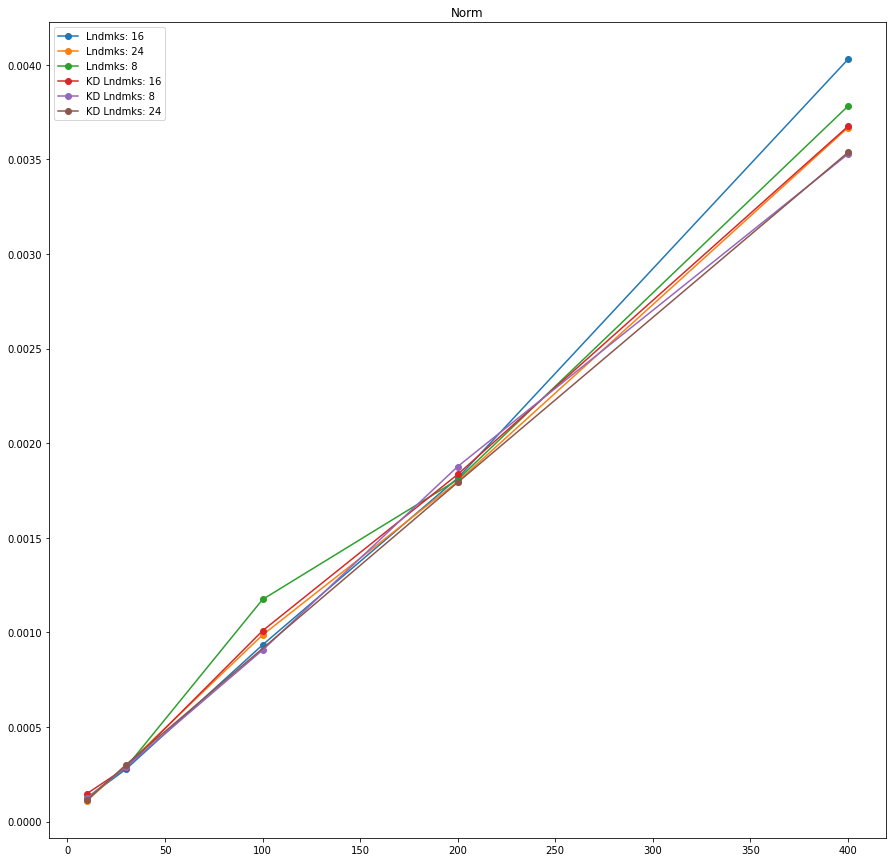

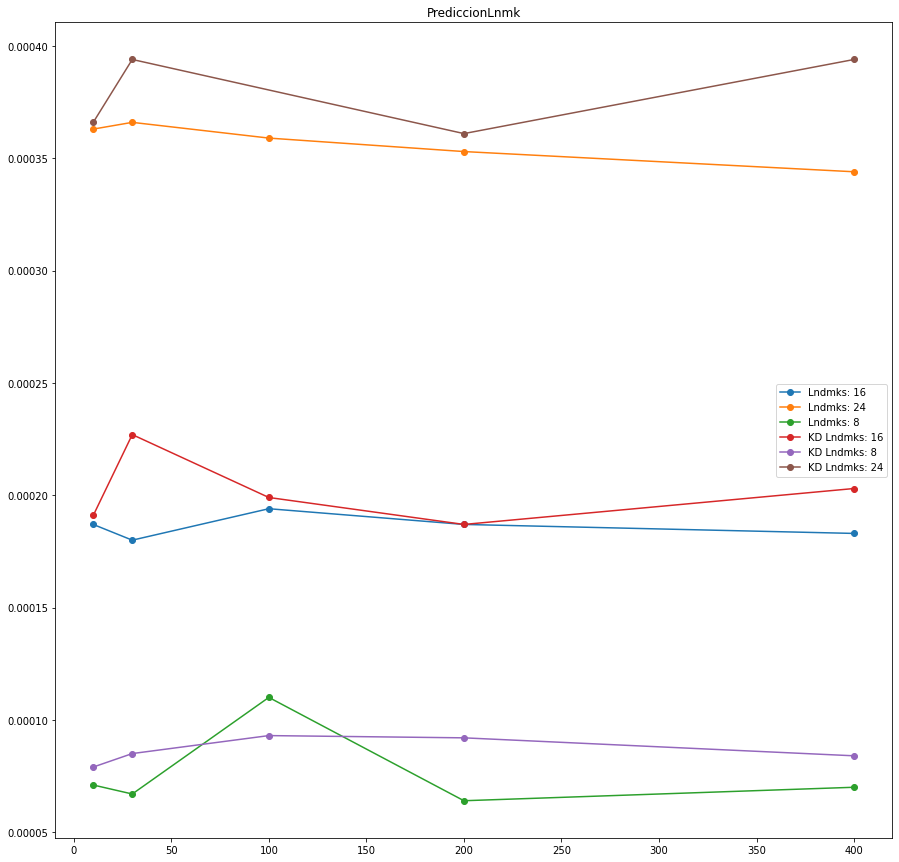

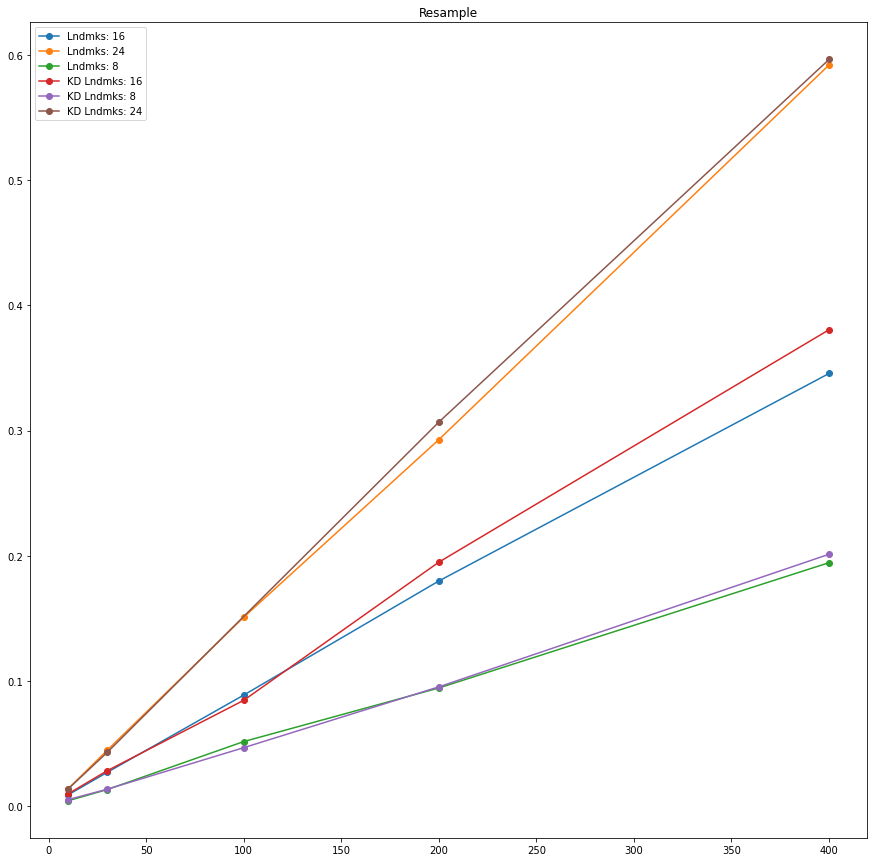

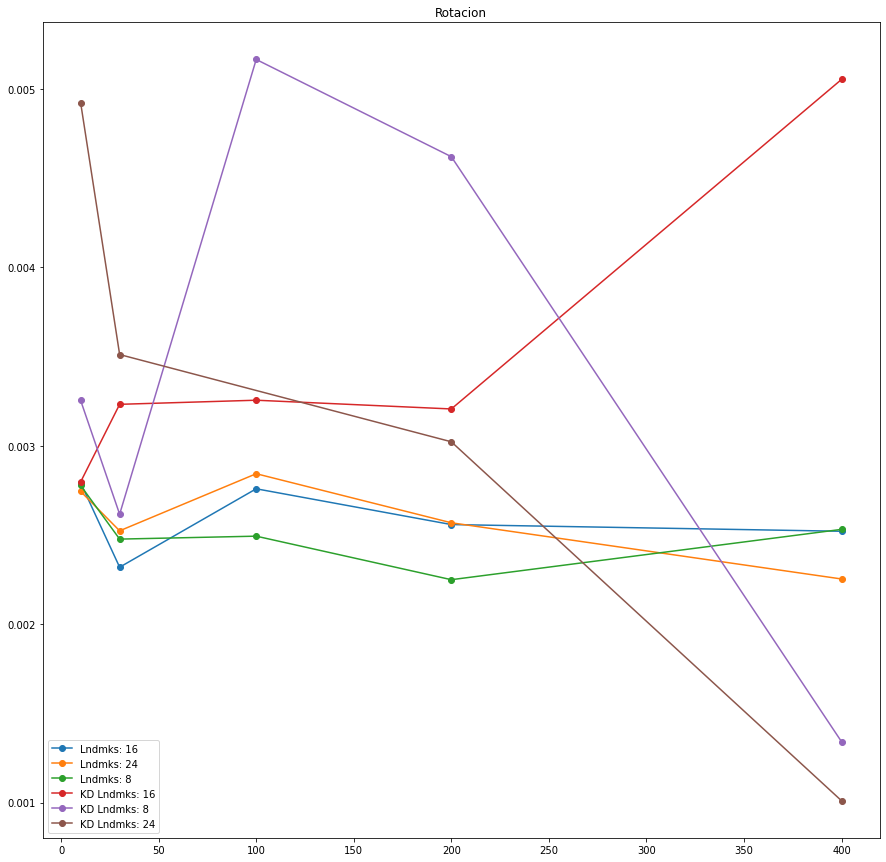

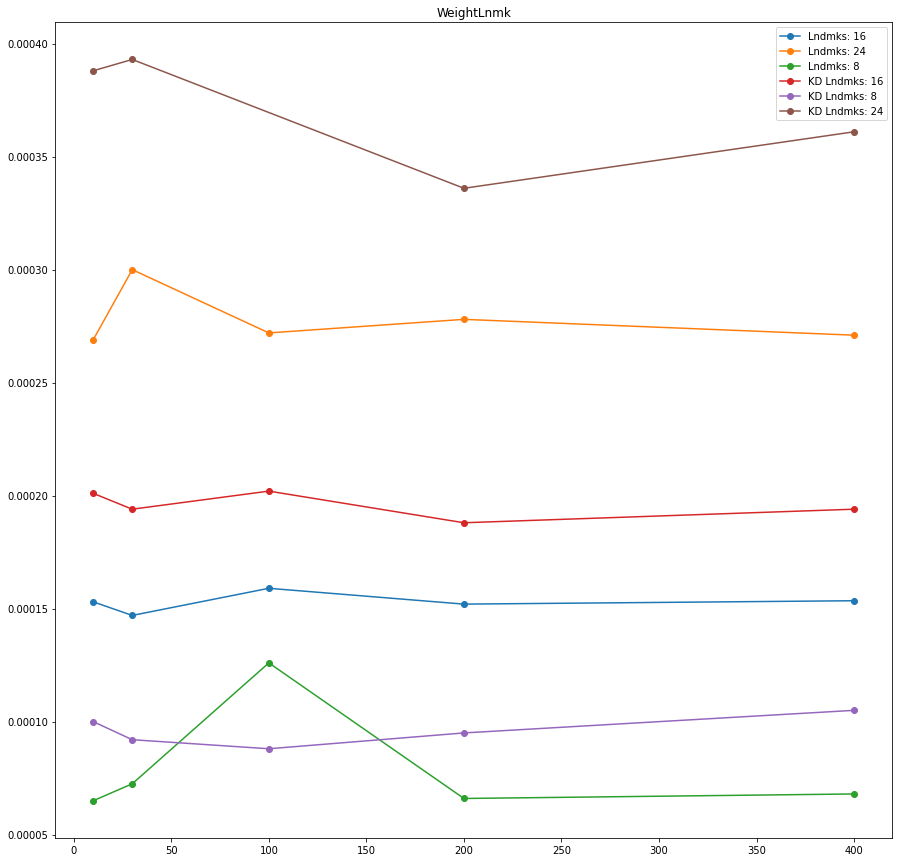

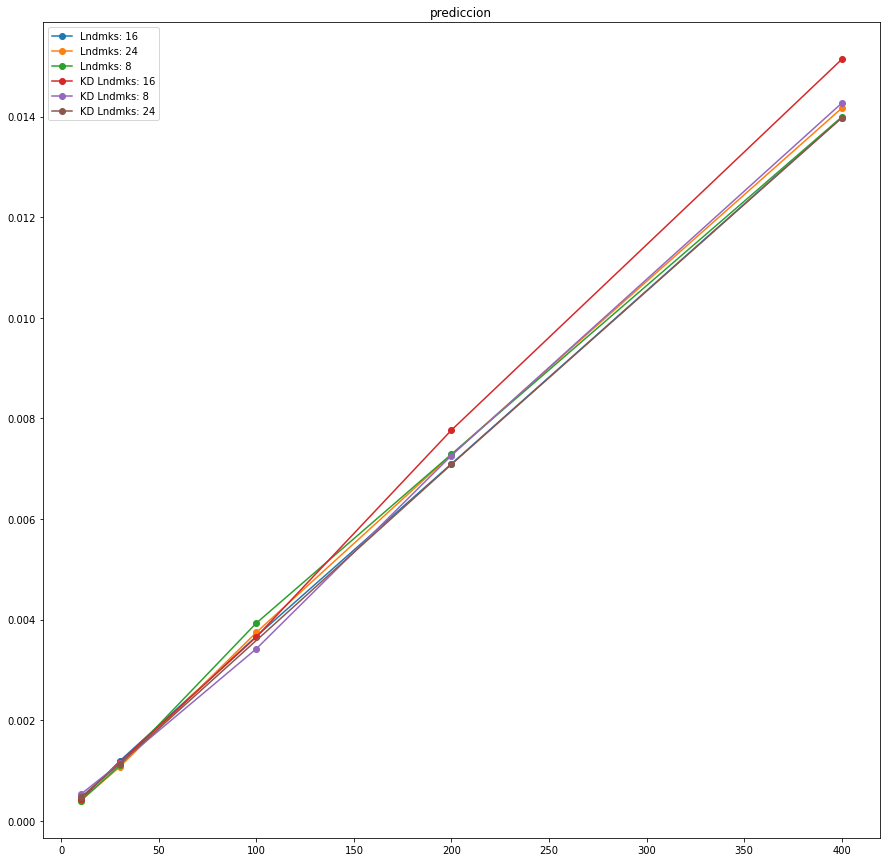

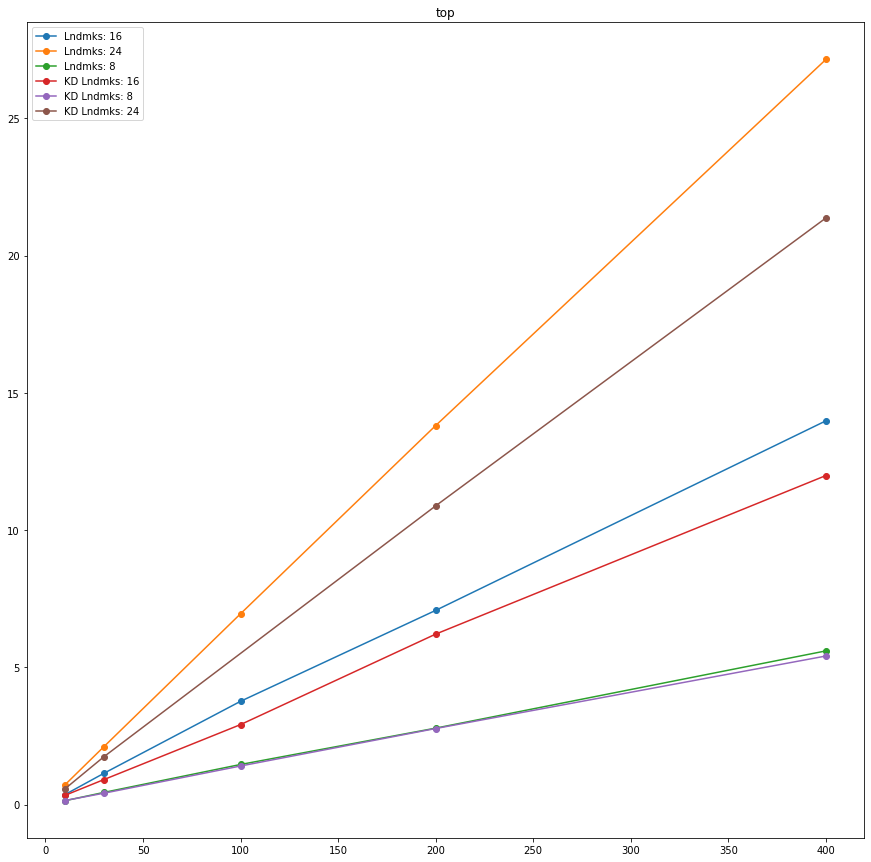

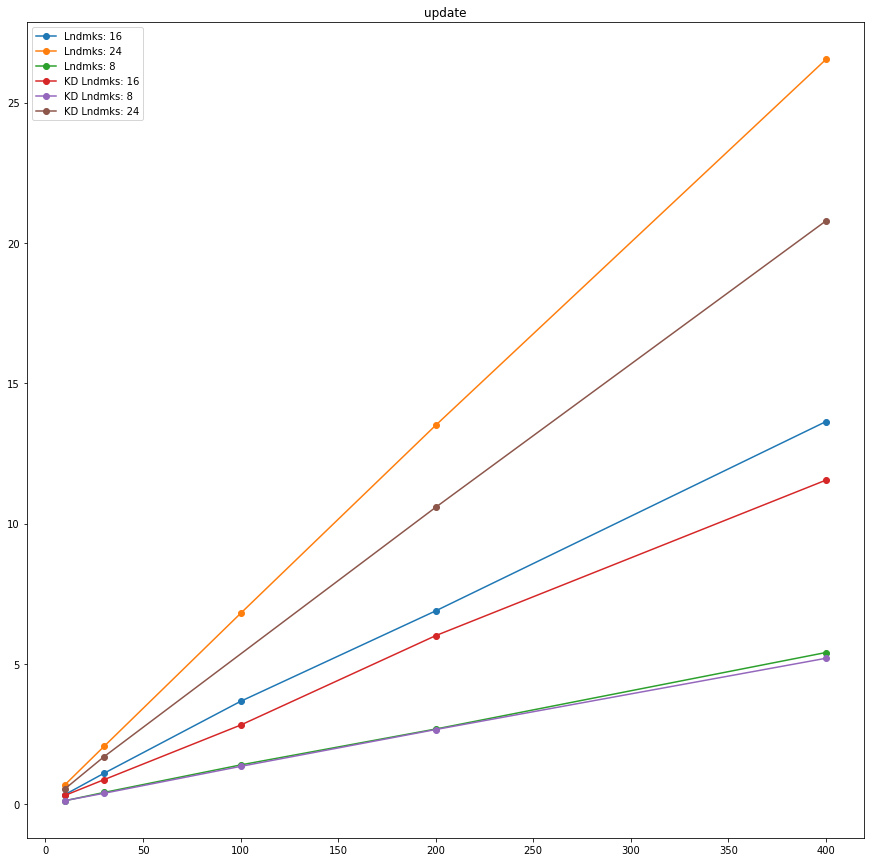

In [148]:
for j in range(len(classes_filtered[0])):
    fig = plt.figure(figsize=(15,15))
    x = []
    y = []
    lndmk = []
    for i in range(len(classes_filtered)):
        if (files_data[i][1] not in lndmk):
            lndmk.append(files_data[i][1])
            x.append([files_data[i][0]])
            y.append([means[i][j]])
        else:
            for k in range(len(lndmk)):
                if (files_data[i][1] == lndmk[k]):
                    x[k].append(files_data[i][0])
                    y[k].append(means[i][j]) 
                    
    for k in range(len(x)):
        x[k],y[k] = (list(t) for t in zip(*sorted(zip(x[k],y[k]))))
                    
    for k in range(len(x)):
        plt.plot(x[k],y[k],'o-', label='Lndmks: '+str(lndmk[k]))

    x = []
    y = []
    lndmk = []
    for i in range(len(classes_kd_tree_filtered)):
        if (files_data_kd_tree[i][1] not in lndmk):
            lndmk.append(files_data_kd_tree[i][1])
            x.append([files_data_kd_tree[i][0]])
            y.append([means_kd_tree[i][j]])
        else:
            for k in range(len(lndmk)):
                if (files_data_kd_tree[i][1] == lndmk[k]):
                    x[k].append(files_data_kd_tree[i][0])
                    y[k].append(means_kd_tree[i][j]) 
                    
    for k in range(len(x)):
        x[k],y[k] = (list(t) for t in zip(*sorted(zip(x[k],y[k]))))
                    
    for k in range(len(x)):
        plt.plot(x[k],y[k],'o-', label='KD Lndmks: '+str(lndmk[k]))

        
        
    plt.title(classes_filtered[0][j])
    plt.legend()
    plt.show()